Access to Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing necessary & required libraries

In [2]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn

Importing Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Reading/Loading Data Set file from google drive

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Amazon Sales data.csv")
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Data Cleaning/Checking for missing values

In [5]:
missing_values = data.isnull().sum()
print("Missing vlaues :\n" ,missing_values)

Missing vlaues :
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


Changing Order Date column format from MM-DD-YYYY to YYYY-MM-DD

In [6]:
data["Order Date"]= pd.to_datetime(data["Order Date"])
data["Year"] = data["Order Date"].dt.year
data["Month"] = data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


# **DATA ANALYSIS**

**Identify the number of Regions**

In [44]:
regions = data['Region'].nunique()
print("Total no of Regions:" , regions)

Total no of Regions: 7


**Identify the number of Countries**

In [45]:
country = data["Country"].nunique()
print("Total no of Countries:" , country)

Total no of Countries: 76


**Identify the number of Item types**

In [46]:
item_type = data["Item Type"].nunique()
print("Total no of items Types :", item_type)

Total no of items Types : 12


**Calculating the Total Units Sold**

In [47]:
unit_sold = data["Units Sold"].sum()
print("Total Unit Sold:" , unit_sold)

Total Unit Sold: 512871


**Calculating the Total Unit Cost**

In [11]:
unit_cost = data['Unit Cost'].sum()
print("Total unit cost:" , unit_cost)

Total unit cost: 19104.8


**Calculating the Total Revenue**

In [12]:
total_revenue = data['Total Revenue'].sum()
print("Total Revenue :" , total_revenue )

Total Revenue : 137348768.31


**Calculating the Total Cost**

In [13]:
total_cost = data["Total Cost"].sum()
print("Total Cost:" , total_cost)

Total Cost: 93180569.91000001


**Calculating the Total Profit**

In [14]:
total_profit = data['Total Profit'].sum()
print("Total Profit :", total_profit)

Total Profit : 44168198.39999999


**Calculating the Total Profit from different Sales Channels in each Region**

In [15]:
data.groupby(['Region' ,'Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

**Plotting an Average Revenue by Year**

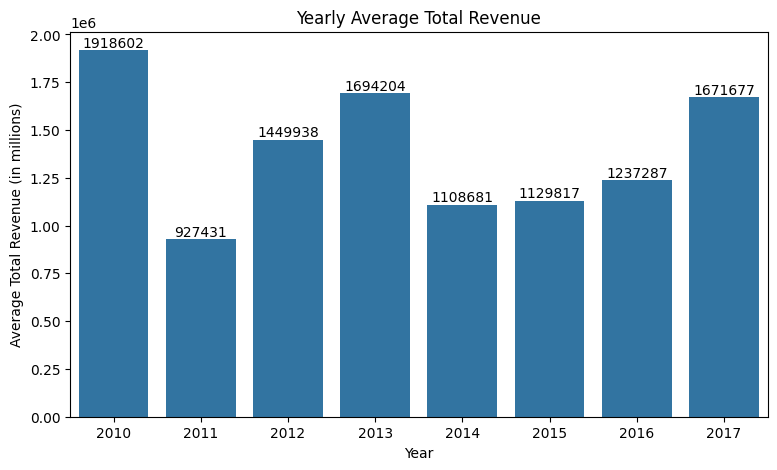

In [57]:
from matplotlib.ticker import MaxNLocator
year_sales = data.groupby('Year')['Total Revenue'].mean()
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=year_sales.index, y=year_sales.values)
plt.title('Yearly Average Total Revenue')
plt.xlabel('Year')
plt.ylabel('Average Total Revenue (in millions)')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
for index, value in enumerate(year_sales.values):
    ax.text(index, value, f'{value:.0f}', ha='center', va='bottom')
plt.show()

**Plotting Average Profit Percentage in region wise**

Text(0.5, 1.0, 'Average Profit % in Region wise ')

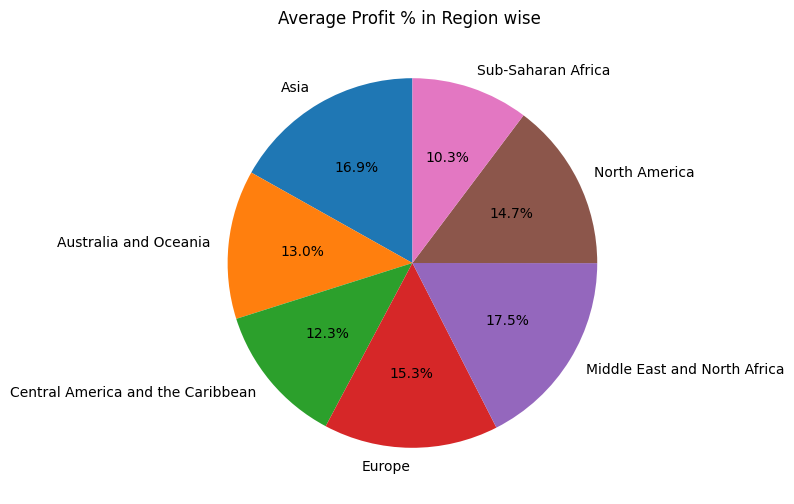

In [49]:
plt.figure(figsize=(6,6))
region_TotalRevenue = data.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue,startangle= 90 , labels =
region_TotalRevenue.index ,autopct = '%1.1f%%')
plt.title('Average Profit % in Region wise ')

**Plotting Total Revenue by Product Type**

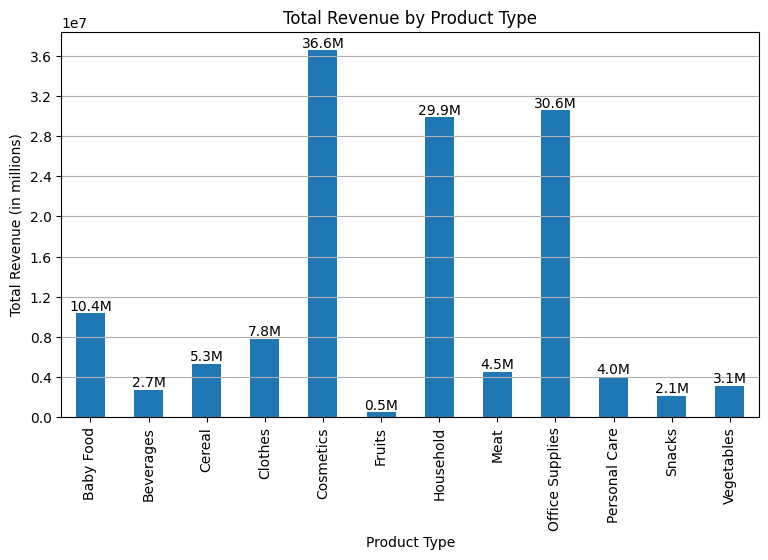

In [59]:
TotalRevenue_ItemType = data.groupby('Item Type')['Total Revenue'].sum()
plt.figure(figsize=(9, 5))
ax = TotalRevenue_ItemType.plot(kind='bar')
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue (in millions)')
plt.grid(axis='y')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
for index, value in enumerate(TotalRevenue_ItemType.values):
    ax.text(index, value, f'{value / 1e6:.1f}M', ha='center', va='bottom')
plt.show()

**Total Percentage Revenue by Sales Channel**

Text(0.5, 1.0, 'Total % Revenue by Sales Channel')

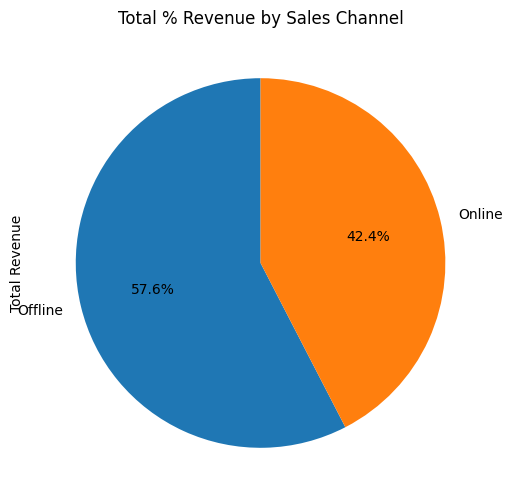

In [61]:
TotalRevenue_SalesChannel = data.groupby('Sales Channel')['Total Revenue'].mean()
plt.figure(figsize =(6,6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind = 'pie' , autopct ='%1.1f%%',startangle=90)
plt.title("Total % Revenue by Sales Channel")

**Percentage Units Sold in each regions**

(-1.0999999530116766,
 1.0999990132545814,
 -1.0999995737000883,
 1.0999999797000042)

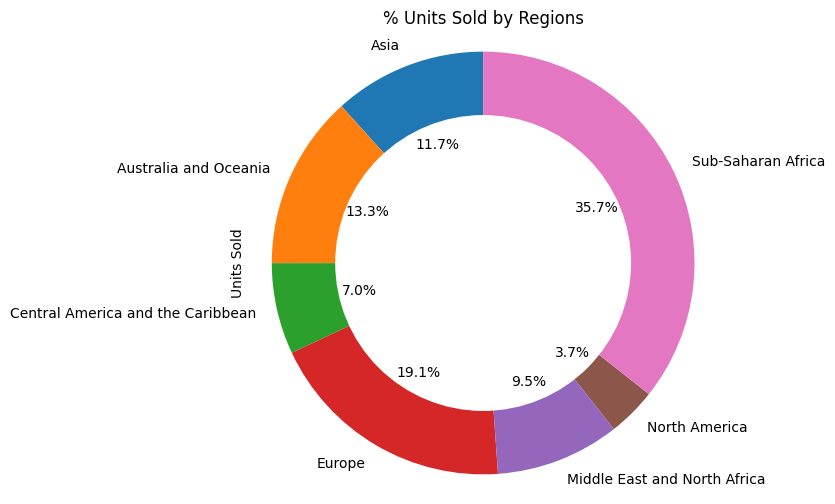

In [65]:
Region_UnitSold = data.groupby('Region')['Units Sold'].sum()
plt.figure(figsize=(6, 6))
Region_UnitSold.plot(kind= 'pie' , labels = Region_UnitSold.index ,
autopct = '%1.1f%%', startangle = 90)
cntr_circle = plt.Circle ((0,0),(0.70),fc ='white')
fig= plt.gcf()
fig.gca().add_artist(cntr_circle)
plt.title('% Units Sold by Regions')
plt.axis('equal')

**Converting Order Date to datetime and extracting Year and Month from Order Date, grouping the data by Year and Month and summing the Units Sold**

In [29]:
data = pd.read_csv('/content/drive/MyDrive/Amazon Sales data.csv')
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
Year_Month_UnitsSold = data.groupby(['Year', 'Month'])['Units Sold'].sum()
print(Year_Month_UnitsSold)
Year_Month = data[['Year', 'Month']].drop_duplicates()
print(Year_Month)

Year  Month
2010  2         9503
      5        15747
      6         9905
      10       14403
      11        7910
      12        4103
2011  1        12914
      2         8156
      4         4187
      5         5741
      6          124
      7          888
      9         3732
      11       19026
2012  1         1548
      2        15776
      3         6457
      4         8903
      5        10984
      6         7620
      7        22646
      8         2804
      9        16545
      10        4684
2013  2         5062
      3         4063
      4         5010
      6         5432
      7        19546
      8         9606
      9         7637
      10        6182
      12        2125
2014  2        10460
      4        13808
      5         9229
      6         8102
      7        14513
      8         4168
      9         2187
      10       22619
      11        6954
2015  1         8250
      2         5821
      4        12772
      7        13110
      8          673
 

**Plotting the Units Sold over Time**

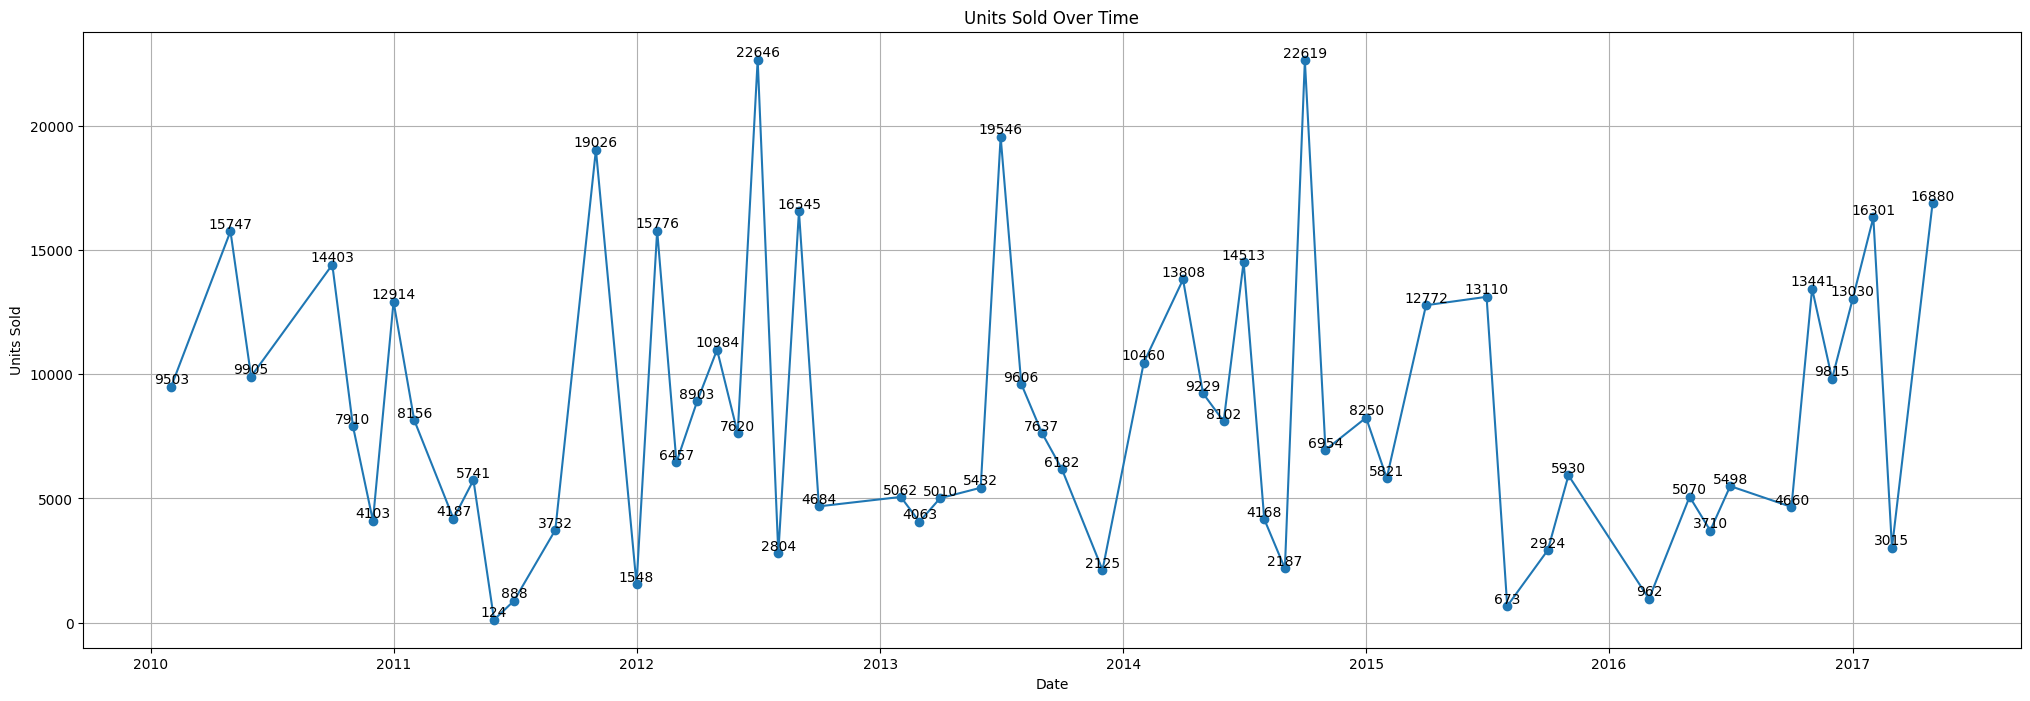

In [71]:
Year_Month_UnitsSold = data.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index()
Year_Month_UnitsSold['Date'] = pd.to_datetime(Year_Month_UnitsSold[['Year', 'Month']].assign(day=1))
Year_Month_UnitsSold = Year_Month_UnitsSold.sort_values('Date')
plt.figure(figsize=(25, 8))
ax = plt.plot(Year_Month_UnitsSold['Date'], Year_Month_UnitsSold['Units Sold'], marker='o')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
for i in range(len(Year_Month_UnitsSold)):
    plt.text(Year_Month_UnitsSold['Date'].iloc[i], Year_Month_UnitsSold['Units Sold'].iloc[i],
             Year_Month_UnitsSold['Units Sold'].iloc[i], ha='center', va='bottom')
plt.show()

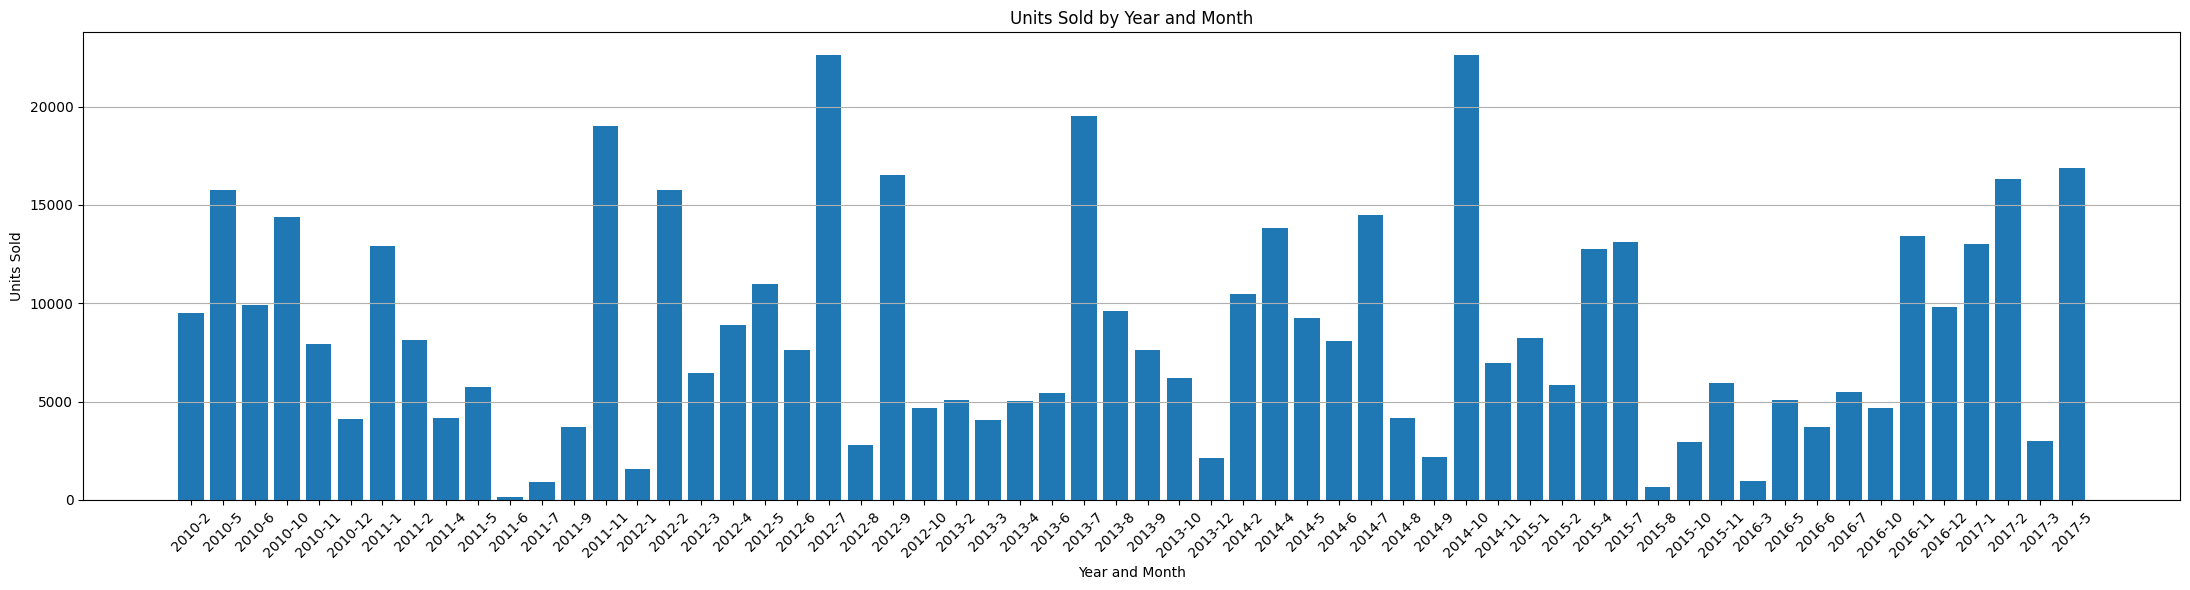

In [79]:
Year_Month_UnitsSold = Year_Month_UnitsSold.reset_index(drop=True)
plt.figure(figsize=(22, 6))
plt.bar(Year_Month_UnitsSold['Year'].astype(str) + '-' + Year_Month_UnitsSold['Month'].astype(str), Year_Month_UnitsSold['Units Sold'])
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Year and Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Plotting Percentage distribution of Total Cost by Sales Channel**

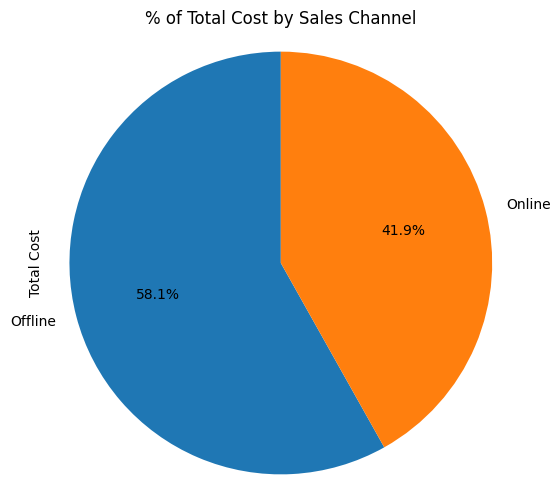

In [76]:
TotalCost_Sales_Channel = data.groupby('Sales Channel')['Total Cost'].sum()
plt.figure(figsize=(6, 6))
ax = TotalCost_Sales_Channel.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('% of Total Cost by Sales Channel')
plt.axis('equal')
plt.show()

**END**